# Tarea 0
## Introducción a máquinas de aprendizaje

**Autor:** Rolando Javier Casanueva Quezada

### Librerias

In [2]:
import numpy as np
import copy
from time import time
from matplotlib import pyplot as plt

### 1. Perceptron a mano

Sea $f$ la función umbral (*treshold*) que utilizaremos para un problema de clasificación binaria.
$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$

#### a) Implementar la función umbral 

Consideraremos agregar el parametro $b$ individualmente. *Nota: Se considera la representación correcta de los valores, es decir, que los valores entregados a la función han sido normalizados para el correcto uso de la función*.

Sea $ x_j^{(i)}$ la matriz $IxJ$ tal que sea el valor  de los atributos $j \in$ {$0$, ..,$J$} de cada instancia $i \in$ {$0$, ..,$I$}. Análogamente, $w_j$ es el vector unidimensional $J$ de parametros $j \in$ {$0$, ..,$J$}. Finalmente $b$ es un escalar. Consideraremos generar una función que $F$ que sea la que acepte los valores recien mencionado, como tener $f$ para el funcionamiento particular por iteración. *Notar: F soporta f*

In [3]:
def f(x, w, b):
    J, = x.shape
    S = np.dot(w.T, x) + b
    if (S == 0):
        return 1
    return 1 if (S/abs(S) > 0) else 0

def F(x, w, b):
    if (len(x.shape) == 1):
        return f(x, w, b)
    if (len(x.shape) == 2):
        return np.where(np.dot(x, w.T) + b < 0, 0, 1)

#### b) Implementar el perceptron clásico

El algoritmo clásico parte con una inicialización aleatorea sobre $w$ y $b$. Luego, hasta no tener errores, se modifican los valores en caso de una clasificación incorrecta. Hay que considerar que el algoritmo clásico utiliza etiquetas de la forma {$-1$,$1$}, sin embargo la función que se nos encargó en el apartado anterior y el etiquetado binario en general utiliza valores {$0$,$1$}, por lo que diseñaremos un normalizador.

In [4]:
def norm(value):
    return -1 if (value == 0) else 1

def unnorm(value):
    return 1 if (value == 1) else 0

In [5]:
class Perceptron(object):

    def __init__(self):
        self.acc = 0
        self.timers = list()
        self.accuracies = list()
        
    def fit(self, x, y, lr=0.3, epochs=-1):
        start = time()
        self.lr = lr
        self.epochs = epochs
        self.I, self.J = x.shape
        self.w = np.zeros(self.J)
        self.b = 0
        epoch = 0
        flag = True
        while flag:
            start_epoch = time()
            flag = False
            accuracies = list()
            epoch += 1
            mistakes = 0
            for i in range(self.I):
                if (y[i] != F(x[i], self.w, self.b)):
                    mistakes += 1
                    self.w =  (self.w.T + self.lr*(norm(y[i]) * x[i])).T
                    self.b = self.b + self.lr*norm(y[i])
                    flag = True
                accuracies.append(((i+1)-mistakes)/(i+1))
            self.acc = accuracies[-1]
            self.accuracies.append(accuracies)
            self.timers.append(time() - start_epoch)
            if (epoch == self.epochs):
                break
        self.real_epoch = epoch
        self.time = time() - start
        
    def predict(self, x):
        return F(x,self.w,self.b)

    def summary(self):
        print ('Generaciones transcurridas:', self.real_epoch)
        print ('Accuracy final de entrenamiento:', round(self.acc*100,3), '%')
        print ('Tiempo de ejecución:', round(self.time, 5), '[s]')

Se deja de todas formas una versión modesta del algoritmo clásico siguiendo el pseudo-código de las **ppt** de clases.

In [6]:
def perceptron(x, y, n=0.3):
    w = np.zeros((J, 1))
    b = 0
    mistakes = True
    while mistakes:
        mistakes = False
        for i in range(I):
            if norm(y[i]) * norm(np.dot(w.T, x[i]) + b) < 0:
                w = (w.T + n*(y[i] * x[i])).T
                b = b + n*y[i]
                mistakes = True
    return (w, b)

#### c) Comprobar que la implementación funciona


In [7]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

X_train,y_train = load_breast_cancer(return_X_y=True) 
I, J = X_train.shape
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
n_training = int(np.ceil(I*.8))
(X_train, y_train), (X_test, y_test) = tuple([X_train[:n_training], y_train[:n_training]]), tuple([X_train[n_training:], y_train[n_training:]])

In [8]:
print ('Cantidad de ejemplos:', I)
print ('Cantidad de atributos:', J)
print ('Cantidad de ejemplos de entrenamiento:', n_training)
print ('Cantidad de ejemplos de testing:', I-n_training)

Cantidad de ejemplos: 569
Cantidad de atributos: 30
Cantidad de ejemplos de entrenamiento: 456
Cantidad de ejemplos de testing: 113


Realizaremos una breves modificaciones al algoritmo, para que calcule el *accuracy* y lo guarde, de forma tal que podamos graficarlo después. También se agregará una medida temporal. Recordamos que el perceptron original utiliza valores $y \in$ {$-1$, $1$}, para lo cual también crearemos una normalización asociada. Reajustaremos la función $f$ para que funcione tanto con valores matriciales como vectoriales e individuales.

In [9]:
p = Perceptron()
p.fit(X_train, y_train, epochs=1)
p.summary()

Generaciones transcurridas: 1
Accuracy final de entrenamiento: 93.421 %
Tiempo de ejecución: 0.00645 [s]


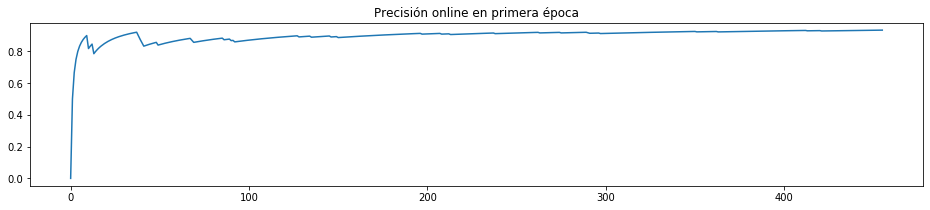

In [10]:
plt.title('Precisión online en primera época')
plt.plot(np.arange(n_training),p.accuracies[0])
plt.gcf().set_size_inches((16,3))
plt.show()

Ahora probaremos el algoritmo con datos no utilizados previamente y encontrar un valor de accuracy menos sesgado al mismo conjunto de entramiento.

In [11]:
predictions = p.predict(X_test)
print ('Accuracy:', round(np.sum(predictions == y_test)/(I-n_training)*100,3), '%')

Accuracy: 98.23 %


#### d) Implementar Forgetron

Esto considerando un algoritmo con memoria de tamaño $K$ y que nuestra función del kernel será el *inner product* <$a$,$b$>$= \sum_i a_i \cdot b_i$. *Nota: consideraremos un maximizador con precisión ajustable a las cifras significativas para no recurrir a extensos tiempos de ejecución, debido al tiempo que requeriría realizar uno ideal. (Maximizador por fuerza bruta)*. El algoritmo mostrado a continuación puede verse en la **sección 4** del paper [[1]](#refs)

In [12]:
def kernel_lineal(a, b):
    return np.sum(a*b)

def GetMax(sigma, mu, Q, M, cs=0.000001):
    for phi in np.arange(0+cs/2, 1, cs):
        psi = (sigma * phi)**2 + 2 * sigma * phi - 2 * sigma * phi**2 * mu
        if (psi - ((15./32) * M - Q) <= 0):
            mphi = copy.copy(phi)
            mpsi = copy.copy(psi)
    return ((phi, psi))

In [13]:
class Forgetron(object):
    
    def __init__(self, K=50, kernel=kernel_lineal):
        self.acc = 0
        self.kernel = kernel
        self.K = K
        self.timer = 0
        self.accuracies = list()
    
    def fit(self, X, y, K=10, CS=0.0001):
        start = time()
        self.K = K if (K!=self.K) else self.K
        n_samples, n_features = X.shape
        
        #epoch
        sigma = np.zeros((n_samples, n_samples))
        I = [set()]
        F = np.zeros(n_samples)
        Q = np.zeros(n_samples)
        M = np.zeros(n_samples)
        for t in range(n_samples-1):
            It = I[t]
            pyt = norm(F[t])
            if (norm(y[t]) * F[t] > 0):
                I.append(It)
                F[t+1] = F[t]
                Q[t+1] = Q[t]
                M[t] = M[t-1] if (t != 0) else 0
            else:
                M[t] = M[t-1] + 1 if (t != 0) else 1
                Itp = I[t]
                Itp.add(t)
                if (len(Itp) <= K):
                    I.append(Itp)
                    Q[t+1] = Q[t]
                    sigma[t,t] = 1
                    for i in I[t+1]:
                        sigma[i,t+1] = sigma[i,t]
                else:
                    rt = min(I[t])
                    sigma_rtt = sigma[rt,t]
                    mut = norm(y[rt]) * (F[t] + norm(y[t]) * self.kernel(X[t], X[rt])) 
                    phi, psi = GetMax(sigma_rtt, mut, Q[t], M[t], cs=CS)
                    sigma[t,t] = 1
                    for i in Itp:
                        sigma[i,t+1] = phi * sigma[i,t]
                    Q[t+1] = Q[t] + psi
                    Itp.remove(rt)
                    I.append(Itp)
            F[t+1] = sum([sigma[i,t+1] * norm(y[i]) * self.kernel(X[i,:], X[t+1,:]) for i in I[t+1]])
            self.accuracies.append(((t+1)-M[t])/(t+1))
        self.acc = self.accuracies[-1]
        self.timer = time() - start

#### e) Comprobación

In [14]:
forg = Forgetron()
forg.fit(X_train, y_train, K=10, CS=0.001)

In [15]:
print ('Tiempo de ejecución:', round(forg.timer, 3), '[s]')
print ('Accuracy final de entrenamiento:', round(forg.acc*100,3),'%')

Tiempo de ejecución: 1.795 [s]
Accuracy final de entrenamiento: 43.956 %


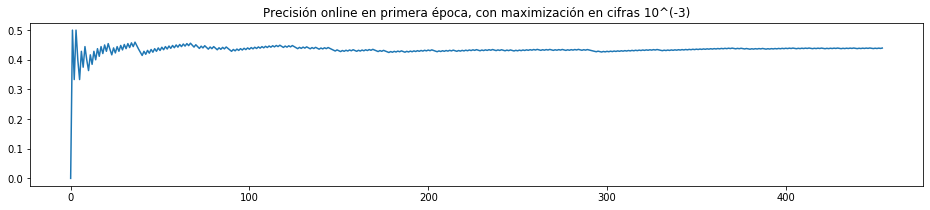

In [16]:
plt.title('Precisión online en primera época, con maximización en cifras 10^(-3)')
plt.plot(np.arange(n_training-1),forg.accuracies)
plt.gcf().set_size_inches((16,3))
plt.show()

In [447]:
forg2 = Forgetron()
forg2.fit(X_train, y_train, K=10, CS=0.00001)

In [448]:
print ('Tiempo de ejecución:', round(forg2.timer, 3), '[s]')
print ('Accuracy final de entrenamiento:', round(forg2.acc*100,3),'%')

Tiempo de ejecución: 268.363 [s]
Accuracy final de entrenamiento: 43.956 %


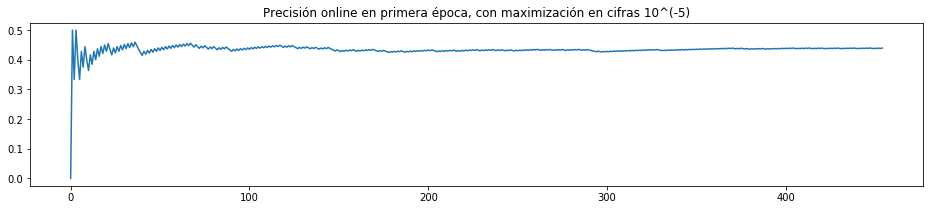

In [450]:
plt.title('Precisión online en primera época, con maximización en cifras 10^(-5)')
plt.plot(np.arange(n_training-1),forg2.accuracies)
plt.gcf().set_size_inches((16,3))
plt.show()

Como podemos notar, aún cuando ambos métodos funcionen de manera online, la función de maximización de $\phi$ en base a la inecuación de $\psi$ consume mucho tiempo computacional, lo cual puede llegar a deberse por el método implementado (*mea culpa*) sin embargo, podemos zanjar que el **accuracy** del forgetron está muy por debajo de lo que encontramos con el perceptron. Es puede deberse más que nada a los ajustes realizados con "*pérdida de memoria*". Como otro valor importante a considerar es que aún con dos distintos tipos de cifras significativas, no cambió el accuracy general, esto puede deberse netamente por los ejemplos. Se deja planteado como un problema a resolver, el análisis de obtención de $\phi_t$.

#### f) Escribir una función sigmoidal e implementar la salida del nuevo modelo

Considerando que la función sigmoid es de la forma. Tras la realización de algunos pruebas, podemos notar como los límites sugeridos por el enunciado de la tarea, no corresponden a un tema a manejar debido a que se maneja solo, de forma que cuando $x > NUM$ o bien $x < -NUM$ con un $|NUM|$ lo suficientemente grande para quedar encasillado en la excepción señalada, los valores resultantes son $1$ y $0$ respectivamente. (Valores esperables para dichos casos)

\begin{align}
\sigma(x) & = \frac{1}{1 + e^{-x}}
\end{align}

$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

In [21]:
def sigmoid(value):
    return (1/(1+np.exp(-value)))

def g(x, w, b):
    J, = x.shape
    S = np.dot(w.T, x) + b
    return sigmoid(S)

def G(x, w, b):
    if (len(x.shape) == 1):
        return g(x, w, b)
    if (len(x.shape) == 2):
        return sigmoid(np.dot(x, w.T) + b)

#### g) Implementar la función de pérdida *Binary Cross Entropy*

Para este caso, tomamos la consideración que esta función la consideramos indefinida para los valores {$0$,$1$} haremos una pequeña alteración modificando los valores de las probabilidad para que se manejen de la forma: 

$$
p  = max(\epsilon, min(1 - \epsilon, g(x;w,b))
$$

$$
\ell (y, \ p)  = - y \cdot \log{(p)} - (1-y) \cdot \log{(1-p)}
$$


In [22]:
def binary_crossentropy(y, x, w, b, eps=1e-15): 
    p = max([eps, min([1-eps, G(x,w,b)])])
    return -y * np.log(p) - (1-y) * np.log(1-p)

#### h) Implementar un gradiente de la función de pérdida

Como ha sido sugerido, se realiza la derivación de manera analítica y luego se escribe la función resultante. Sea $\nabla_wX$ la función de gradiente que calcula las derivadas $X$ con respecto a $w$. Consideremos las siguientes derivadas

\begin{align}
\nabla_w g(x;w,b) &= \frac{\partial}{\partial w} w^T x + b \\
&= x \\
\end{align}

Por otra parte, nuestra función sigmoidal ha sido entregado el gradiente, pero lo obtendremos de todas formas

\begin{align}
\nabla_x \sigma(x) & = \frac{\partial}{\partial x} \frac{1}{1 + e^{-x}} \\
&= \frac{\partial}{\partial x} (1 + e^{-x})^{-1} \\
&= (-1) \cdot (1 + e^{-x})^{-2} \frac{\partial}{\partial x} (1 + e^{-x}) \\
&= (-1) \cdot (1 + e^{-x})^{-2} \cdot (e^{-x}) \frac{\partial}{\partial x} (-x) \\
&= (-1) \cdot (1 + e^{-x})^{-2} \cdot (e^{-x}) \cdot (-1) \\
&= \frac{e^{-x}}{(1 + e^{-x})^2} \\
&= \frac{1}{1 + e^{-x}} \cdot \frac{-1 + 1 + e^{-x}}{1 + e^{-x}} \\
&= \frac{1}{1 + e^{-x}} \cdot (1 - \frac{1}{1 + e^{-x}}) \\
&= \sigma \cdot (1 - \sigma) \\
\end{align}

Luego si reemplazamos en la función inicial y luego derivamos en conocimiento de las demostraciones anteriores, podemos deducir la siguiente expresión

\begin{align}
p(x, w, b) &= \frac{1}{1 + e^{-\left( \sum_j w_j \cdot x^{(i)}_j +b \right)}} \\
\ell (y, p) &= y \cdot \log(p) - (1 - y) \cdot \log(1 - p) \\
\\
\nabla_w \ell(y^{(i)}, x^{(i)}; w, b) &= g(x^{(i)};w,b) \cdot (1 - g(x^{(i)};w,b)) \cdot \left(x^{(i)}\right) \cdot \left[\frac{y^{(i)}}{g(x^{(i)};w,b)} + (1 - y^{(i)}) \cdot g(-x^{(i)};w,b)\right]
\end{align}

In [23]:
def gradiente_bce(x, y, w, b):
    g1 = G(x,w,b)
    g2 = G(-x,w,b)
    S = (g1 * (1 - g1) * ((y/g1) + (1-y)*g2))
    return S * x

#### i) Modificar el perceptrón

Ahora será necesario modificar el perceptrón para que se adapte a la función objetivo *BCE* recien implementada, con lo que adoptaremos el uso del algoritmo de optimización SGD con tasa de aprendizaje $\eta \in$ [$0$,$1$].

In [30]:
class PerceptronM(object):

    def __init__(self, func = F):
        self.acc = 0
        self.treshold = func
        self.timers = list()
        self.accuracies = list()
        self.losses = list()
        
    def fit(self, x, y, lr=0.3, epochs=-1):
        start = time()
        self.lr = lr
        self.epochs = epochs
        self.I, self.J = x.shape
        self.w = np.zeros(self.J)
        self.b = 0
        epoch = 0
        flag = True
        while flag:
            start_epoch = time()
            flag = False
            accuracies = list()
            epoch += 1
            mistakes = 0
            loss = list()
            for i in range(self.I):
                if (y[i] != self.treshold(x[i], self.w, self.b)):
                    mistakes += 1
                    self.w =  (self.w.T + self.lr*(gradiente_bce(x[i], y[i], self.w, self.b))).T
                    flag = True
                loss.append(binary_crossentropy(y[i], x[i], self.w, self.b))
                accuracies.append(((i+1)-mistakes)/(i+1))
            self.acc = accuracies[-1]
            self.accuracies.append(accuracies)
            self.losses.append(loss)
            self.timers.append(time() - start_epoch)
            if (epoch == self.epochs):
                break
        self.real_epoch = epoch
        self.time = time() - start
        
    def predict(self, x):
        return self.treshold(x,self.w,self.b)

    def summary(self):
        print ('Generaciones transcurridas:', self.real_epoch)
        print ('Accuracy final de entrenamiento:', round(self.acc*100,3), '%')
        print ('Tiempo de ejecución:', round(self.time, 5), '[s]')

#### j) Comprobar

Ahora se corren los algoritmos y se gráfican tanto *accuracy* como *loss* por dato, en una sola época.

In [31]:
p2 = PerceptronM(func=G)
p2.fit(X_train, y_train, lr=0.66, epochs=1)

In [32]:
p2.summary()

Generaciones transcurridas: 1
Accuracy final de entrenamiento: 0.219 %
Tiempo de ejecución: 0.02378 [s]


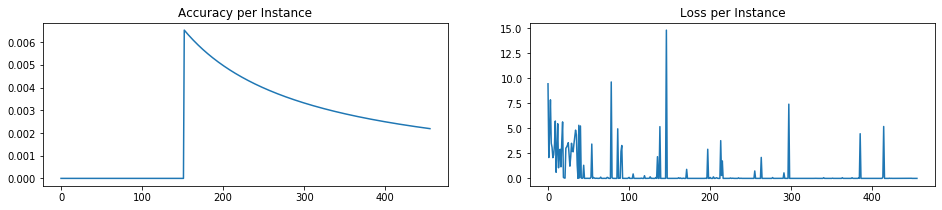

In [36]:
plt.subplot(1, 2, 1)
plt.title('Accuracy per Instance')
plt.plot(np.arange(n_training),p2.accuracies[0])
plt.subplot(1, 2, 2)
plt.title('Loss per Instance')
plt.plot(np.arange(n_training),p2.losses[0])
plt.gcf().set_size_inches((16,3))
plt.show()

Ahora, realizarémos un par de pruebas, aumentando las épocas para ver si aumenta el accuracy

In [52]:
p3 = PerceptronM(func=G)
p3.fit(X_train, y_train, lr=0.5, epochs=1)

In [53]:
p3.summary()

Generaciones transcurridas: 1
Accuracy final de entrenamiento: 0.219 %
Tiempo de ejecución: 0.02778 [s]


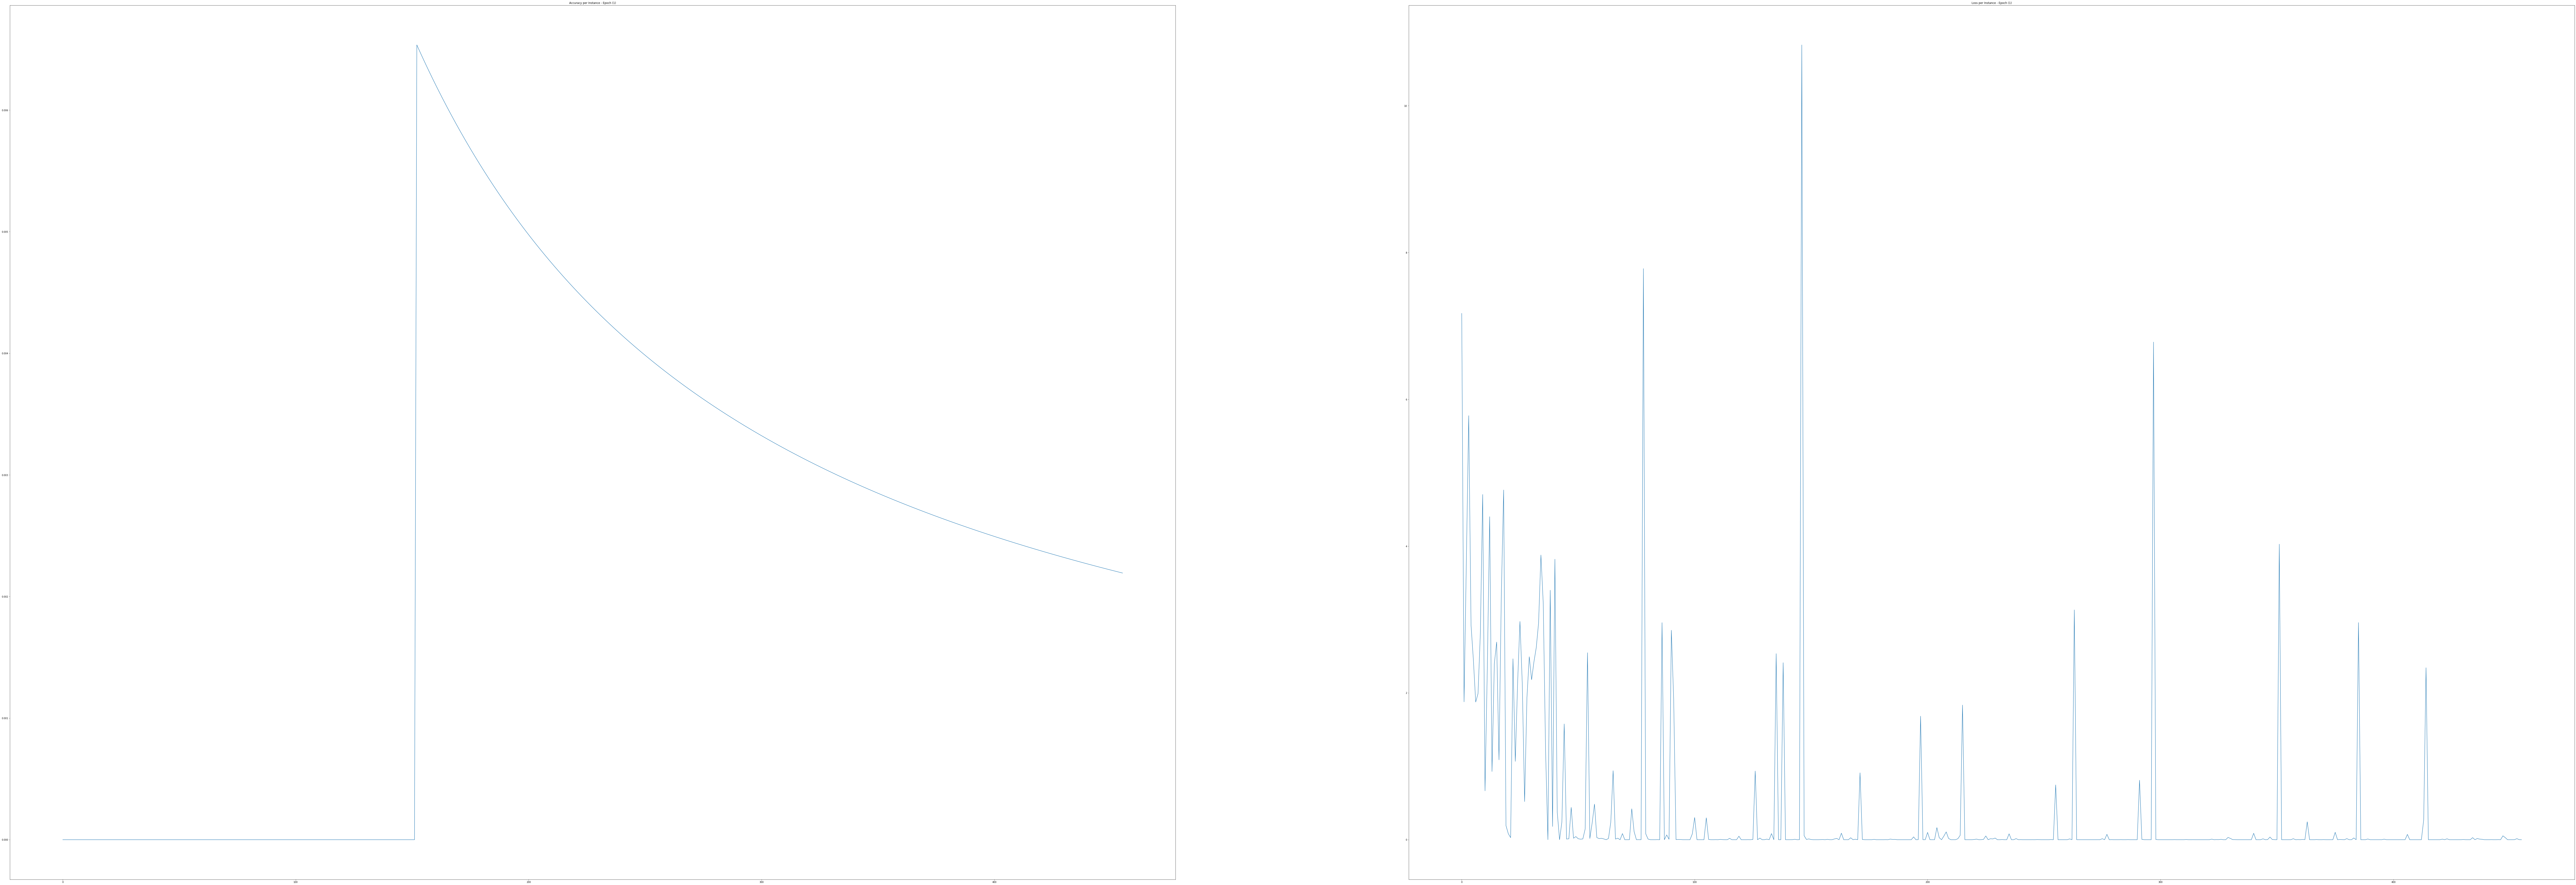

In [54]:
for index in range(p3.real_epoch):
    plt.figure()
    plt.subplot(p3.real_epoch, 2*p3.real_epoch, (2*index + 1))
    plt.title('Accuracy per Instance - Epoch (' +str(index+1) + ')')
    plt.plot(np.arange(n_training),p3.accuracies[index])
    plt.subplot(p3.real_epoch, 2*p3.real_epoch, (2*index + 2))
    plt.title('Loss per Instance - Epoch (' +str(index+1) + ')')
    plt.plot(np.arange(n_training),p3.losses[index])
    plt.gcf().set_size_inches((200,70))

Por simplicidad,en adelante no se gráficarán los resultados, solo mostrarán unas métricas básicas.

In [50]:
p4 = PerceptronM(func=G)
p4.fit(X_train, y_train, lr=0.1, epochs=1)

In [51]:
p4.summary()

Generaciones transcurridas: 1
Accuracy final de entrenamiento: 0.0 %
Tiempo de ejecución: 0.02086 [s]


In [46]:
p5 = PerceptronM(func=G)
p5.fit(X_train, y_train, lr=0.9, epochs=1)

In [47]:
p5.summary()

Generaciones transcurridas: 1
Accuracy final de entrenamiento: 0.658 %
Tiempo de ejecución: 0.0218 [s]


Como podemos notar, las épocas si cumplen un rol, sin embargo también notamos como converge a un número velozmente, principalmente se debe deber a la cantidad de datos. Si ahora, realizamos testing sobre los distintos métodos entrenados.

In [55]:
pred2 = np.where(p2.predict(X_test) >= 0.5, 1, 0) == y_test
print ('Perceptron ({0}) Epoca - Accuracy Test: '.format(p2.real_epoch), round(sum(pred2)/len(pred2)*100,3), '%')

Perceptron (1) Epoca - Accuracy Test:  92.92 %


In [56]:
pred3 = np.where(p3.predict(X_test) >= 0.5, 1, 0) == y_test
print ('Perceptron ({0}) Epoca - Accuracy Test: '.format(p3.real_epoch), round(sum(pred3)/len(pred3)*100,3), '%')

Perceptron (1) Epoca - Accuracy Test:  93.805 %


In [57]:
pred4 = np.where(p4.predict(X_test) >= 0.5, 1, 0) == y_test
print ('Perceptron ({0}) Epoca - Accuracy Test: '.format(p4.real_epoch), round(sum(pred4)/len(pred4)*100,3), '%')

Perceptron (1) Epoca - Accuracy Test:  95.575 %


In [58]:
pred5 = np.where(p5.predict(X_test) >= 0.5, 1, 0) == y_test
print ('Perceptron ({0}) Epoca - Accuracy Test: '.format(p5.real_epoch), round(sum(pred5)/len(pred5)*100,3), '%')

Perceptron (1) Epoca - Accuracy Test:  92.035 %


Impresionantemente, se lográ apreciar que desde el primer entrenamiento podemos notar ya la convergencia del accuracy para testeo. Aún así, ~ $90$% Accuracy no está nada mal.

<a id="refs"></a>
### Referencias & Bibliografía
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  
[5] Rosipal, R., Trejo, L. (2001) *Kernel Partial Least Squares Regression in Reproducing Kernel Hilbert Space*. Journal of Machine Learning Research (pp. 97-123)